In [30]:
import pandas as pd
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [31]:
g_data = pd.read_csv("data/Stanica IPH/GDAS_2017_2019_IPH.csv")
g_data = g_data.dropna()
g_data['Date']= pd.to_datetime(g_data['Date'])
g_data.t02m -= 273.15  # convert to Celsius
# gdas_data.info()

In [32]:
p_data = pd.read_csv("data/Stanica IPH/Polutanti_2017_2019_IPH.csv")
p_data = p_data.dropna()
p_data['Date']= pd.to_datetime(p_data['Date'])
p_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25425 entries, 0 to 26279
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    25425 non-null  datetime64[ns]
 1   SO2     25425 non-null  float64       
 2   NO      25425 non-null  float64       
 3   NO2     25425 non-null  float64       
 4   NOx     25425 non-null  float64       
 5   PM10    25425 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.4 MB


In [33]:
p_data[:5]

Date    SO2      NO    NO2     NOx    PM10
0 2017-01-01 00:00:00  55.82   92.17  68.57  160.74  196.57
1 2017-01-01 01:00:00  56.10  151.10  82.93  234.03  220.34
2 2017-01-01 02:00:00  53.44  165.53  80.30  245.84  147.36
3 2017-01-01 03:00:00  57.38  206.89  88.57  295.46  170.34
4 2017-01-01 04:00:00  57.82  170.65  81.91  252.56  161.27

In [34]:
g_data[:5]

Date     prss     mslp  tpp6  umof  vmof   shif    dswf  \
0  2017-01-01 00:00:00  1007.80  1030.97   0.0  0.00  0.00  -4.24    4.00   
3  2017-01-01 03:00:00  1004.37  1029.13   0.0  0.00  0.00  -6.07    4.00   
6  2017-01-01 06:00:00  1004.03  1028.49   0.0  0.00  0.00  -6.07    4.00   
9  2017-01-01 09:00:00  1004.32  1027.10   0.0  0.00 -0.01   0.22  119.22   
12 2017-01-01 12:00:00  1001.60  1025.53   0.0 -0.01 -0.02  15.76  223.46   

     rh2m   wd10m  ...  cppa  solm  csno  cice  cfzr  crai  lcld  lhtf  mcld  \
0   68.25  227.73  ...   0.0  0.26   0.0   0.0   0.0   0.0   0.0 -1.00  0.00   
3   68.43  216.04  ...   0.0  0.26   0.0   0.0   0.0   0.0   0.0 -1.00  0.00   
6   69.11  190.93  ...   0.0  0.26   0.0   0.0   0.0   0.0   0.0 -1.00  0.10   
9   49.41  177.24  ...   0.0  0.26   0.0   0.0   0.0   0.0   0.0  0.00  9.37   
12  42.33  151.28  ...   0.0  0.26   0.0   0.0   0.0   0.0   0.0  1.78  5.75   

     hcld  
0   37.19  
3   57.03  
6   62.53  
9   81.17  
12  68.68  

[5 rows x 30 columns]

In [35]:
m_data = pd.merge(g_data, p_data, left_on='Date', right_on='Date')

In [36]:
m_data[:5]

Date     prss     mslp  tpp6  umof  vmof   shif    dswf  \
0 2017-01-01 00:00:00  1007.80  1030.97   0.0  0.00  0.00  -4.24    4.00   
1 2017-01-01 03:00:00  1004.37  1029.13   0.0  0.00  0.00  -6.07    4.00   
2 2017-01-01 06:00:00  1004.03  1028.49   0.0  0.00  0.00  -6.07    4.00   
3 2017-01-01 09:00:00  1004.32  1027.10   0.0  0.00 -0.01   0.22  119.22   
4 2017-01-01 12:00:00  1001.60  1025.53   0.0 -0.01 -0.02  15.76  223.46   

    rh2m   wd10m  ...  crai  lcld  lhtf  mcld   hcld    SO2      NO    NO2  \
0  68.25  227.73  ...   0.0   0.0 -1.00  0.00  37.19  55.82   92.17  68.57   
1  68.43  216.04  ...   0.0   0.0 -1.00  0.00  57.03  57.38  206.89  88.57   
2  69.11  190.93  ...   0.0   0.0 -1.00  0.10  62.53  58.56  187.15  78.61   
3  49.41  177.24  ...   0.0   0.0  0.00  9.37  81.17  57.15   90.64  69.38   
4  42.33  151.28  ...   0.0   0.0  1.78  5.75  68.68  66.77   25.04  63.25   

      NOx    PM10  
0  160.74  196.57  
1  295.46  170.34  
2  265.76  122.10  
3  160.02  213.56  
4   88.29  143.26  

[5 rows x 35 columns]

In [37]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(0, len(dataset)-look_back-1, look_back):
        a = dataset[i:(i+look_back)]
        dataX.append(a.to_numpy())
        b = dataset[i + look_back:i + look_back+1]
        dataY.append(b.to_numpy())
    return np.array(dataX), np.array(dataY)

In [38]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [39]:
m_data.describe().transpose()

count         mean         std     min        25%       50%  \
prss   8362.0   995.119224    6.844110  966.75   990.9200   994.825   
mslp   8362.0  1017.135444    7.141194  986.70  1012.7625  1016.570   
tpp6   8362.0     0.000166    0.001306    0.00     0.0000     0.000   
umof   8362.0     0.013262    0.134694   -0.69    -0.0400     0.000   
vmof   8362.0    -0.013393    0.148405   -0.92    -0.0500     0.000   
shif   8362.0    18.519085   65.451674 -139.71   -26.4650    -6.175   
dswf   8362.0   179.871490  232.172221   -3.00     0.0000    58.325   
rh2m   8362.0    68.361070   17.466027   14.71    55.8900    70.245   
wd10m  8362.0   199.353845   83.445714    7.34   132.5425   187.495   
ws10m  8362.0     3.114196    1.666588    0.31     1.9000     2.740   
t02m   8362.0    12.694206    9.332991  -14.17     5.5725    13.035   
tcld   8362.0    51.095411   39.069027    0.00     9.0800    52.400   
shgt   8362.0   185.769273    5.998970  178.25   184.3900   184.390   
cape   8362.0    96.759480  287.590091    0.00     0.0000     0.000   
cinh   8362.0   -14.468063   42.992074 -600.26    -3.9350    -0.030   
lisd   8362.0   280.607178    7.038548  263.28   275.0300   280.080   
lib4   8362.0     4.499874    5.120380   -9.46     0.5700     4.030   
pblh   8362.0   454.298809  501.856313   -7.52    67.4525   267.360   
tmps   8362.0   285.869988   10.129981  258.34   278.2600   285.770   
cppa   8362.0     0.000075    0.000878    0.00     0.0000     0.000   
solm   8362.0     0.075759    0.111174    0.00     0.0000     0.000   
csno   8362.0     0.027864    0.164593    0.00     0.0000     0.000   
cice   8362.0     0.000000    0.000000    0.00     0.0000     0.000   
cfzr   8362.0     0.000120    0.010936    0.00     0.0000     0.000   
crai   8362.0     0.094714    0.292837    0.00     0.0000     0.000   
lcld   8362.0    23.261259   32.736891    0.00     0.0000     3.115   
lhtf   8362.0    64.706461   99.981629  -17.40     4.7300    16.910   
mcld   8362.0    22.712713   33.500196    0.00     0.0000     0.790   
hcld   8362.0    37.975574   37.752684    0.00     0.0000    26.050   
SO2    8362.0    27.282674   21.959235    0.50     9.4225    22.295   
NO     8362.0    45.022711   63.436570    0.50    10.6025    23.385   
NO2    8362.0    47.835238   34.019694    0.50    24.4000    41.225   
NOx    8362.0   105.479261  106.764263    1.46    40.8800    74.745   
PM10   8362.0    38.390990   37.466955    0.50    16.6925    27.900   

             75%      max  
prss    999.1375  1016.89  
mslp   1021.2700  1041.20  
tpp6      0.0000     0.03  
umof      0.0400     1.10  
vmof      0.0400     1.14  
shif     47.9250   338.86  
dswf    329.6375   811.02  
rh2m     82.3475   100.32  
wd10m   279.6375   357.07  
ws10m     3.9100    11.86  
t02m     19.6200    39.28  
tcld     93.4200   100.00  
shgt    184.3900   197.32  
cape     12.4300  3271.93  
cinh      0.0100     0.50  
lisd    285.5750   306.70  
lib4      7.8300    22.47  
pblh    680.2775  3389.58  
tmps    292.7275   320.20  
cppa      0.0000     0.02  
solm      0.1600     0.37  
csno      0.0000     1.00  
cice      0.0000     0.00  
cfzr      0.0000     1.00  
crai      0.0000     1.00  
lcld     40.1100   100.00  
lhtf     73.4950   483.61  
mcld     40.2650   100.00  
hcld     75.2625   100.00  
SO2      40.9800   279.75  
NO       55.8375  1037.09  
NO2      63.4000   661.60  
NOx     133.6475  1534.00  
PM10     45.5475   522.71

In [40]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8362 entries, 0 to 8361
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    8362 non-null   datetime64[ns]
 1   prss    8362 non-null   float64       
 2   mslp    8362 non-null   float64       
 3   tpp6    8362 non-null   float64       
 4   umof    8362 non-null   float64       
 5   vmof    8362 non-null   float64       
 6   shif    8362 non-null   float64       
 7   dswf    8362 non-null   float64       
 8   rh2m    8362 non-null   float64       
 9   wd10m   8362 non-null   float64       
 10  ws10m   8362 non-null   float64       
 11  t02m    8362 non-null   float64       
 12  tcld    8362 non-null   float64       
 13  shgt    8362 non-null   float64       
 14  cape    8362 non-null   float64       
 15  cinh    8362 non-null   float64       
 16  lisd    8362 non-null   float64       
 17  lib4    8362 non-null   float64       
 18  pblh    

In [41]:
# plt.hist2d(m_data['wd10m'], m_data['ws10m'], bins=(50, 50), vmax=400)
# plt.colorbar()
# plt.xlabel('Wind Direction [deg]')
# plt.ylabel('Wind Velocity [m/s]')

In [42]:
df = m_data
# column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df.loc[0:int(n*0.7), :]
val_df = df.loc[int(n*0.7):int(n*0.9), :]
test_df = df.loc[int(n*0.9):, :]

# num_features = df.shape[1]

In [43]:
train_mean = train_df.mean(numeric_only = True)
train_std = train_df.std(numeric_only = True)

test_mean = test_df.mean(numeric_only = True)
test_std = test_df.std(numeric_only = True)

val_mean = val_df.mean(numeric_only = True)
val_std = val_df.std(numeric_only = True)


In [44]:

for i, a in enumerate(train_mean.axes):
    train_df.loc[:,a] = (train_df.loc[:,a]- train_mean[a])/train_std[a]
    test_df.loc[:, a] = (test_df.loc[:, a]- test_mean[a])/test_std[a]
    val_df.loc[:, a] =  (val_df.loc[:, a]- val_mean[a])/val_std[a]

#     train_df.loc[:,a] = train_df.loc[:,a]# (train_df.loc[:,a]- train_mean[a])/train_std[a]
#     test_df.loc[:, a] = test_df.loc[:, a]# (test_df.loc[:, a]- test_mean[a])/test_std[a]
#     val_df.loc[:, a] =  val_df.loc[:, a]#(val_df.loc[:, a]- val_mean[a])/val_std[a]
    
    
    #     print('a')
    

/home/djordje/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [45]:
train_df.describe().transpose()

count      mean       std         min       25%       50%       75%  \
prss   5854.0 -0.025069  2.185256 -148.675728 -0.627813 -0.046768  0.597102   
mslp   5854.0 -0.024654  2.155210 -146.083682 -0.629045 -0.085461  0.599805   
tpp6   5854.0 -0.015108  1.529730  -88.570887 -0.126590 -0.126590 -0.126590   
umof   5854.0 -0.000597  1.001358   -4.530367 -0.377147 -0.069501  0.238144   
vmof   5854.0  0.000068  1.000018   -5.666550 -0.289263  0.069223  0.356012   
shif   5854.0 -0.000020  1.000007   -2.440306 -0.677067 -0.367168  0.412452   
dswf   5854.0 -0.000064  1.000044   -0.874497 -0.770675 -0.515695  0.635181   
rh2m   5854.0 -0.000879  1.000835   -3.523032 -0.712582  0.106579  0.803907   
wd10m  5854.0 -0.000520  1.000420   -2.330682 -0.825115 -0.120724  0.960642   
ws10m  5854.0 -0.000268  1.000380   -2.201835 -0.739508 -0.210661  0.488228   
t02m   5854.0 -0.000086  1.000144   -2.689243 -0.806149  0.048318  0.774527   
tcld   5854.0 -0.000425  1.000000   -1.312191 -1.069616  0.023831  1.084567   
shgt   5854.0 -0.010514  1.288345  -62.153149 -0.605851 -0.605851  1.650289   
cape   5854.0 -0.000007  1.000003   -0.390317 -0.349801 -0.349801 -0.298899   
cinh   5854.0  0.000008  1.000003  -13.342090  0.252165  0.350448  0.351242   
lisd   5854.0 -0.007764  1.155954  -44.378489 -0.816258 -0.074945  0.727255   
lib4   5854.0 -0.000199  0.999988   -2.603642 -0.794116 -0.075621  0.662685   
pblh   5854.0 -0.000063  1.000046   -0.917475 -0.767588 -0.371361  0.438749   
tmps   5854.0 -0.005043  1.078290  -30.892676 -0.788911 -0.004269  0.704777   
cppa   5854.0 -0.019623  1.804940 -114.966161 -0.092877 -0.092877 -0.092877   
solm   5854.0 -0.001275  1.005503   -8.059451 -0.595899 -0.595899  0.904162   
csno   5854.0 -0.000348  1.000423   -2.234529 -0.195246 -0.195246 -0.195246   
cice      0.0       NaN       NaN         NaN       NaN       NaN       NaN   
cfzr   5854.0      -inf       NaN        -inf -0.013070 -0.013070 -0.013070   
crai   5854.0 -0.000202  1.000188   -1.521936 -0.341657 -0.341657 -0.341657   
lcld   5854.0 -0.000476  0.999636   -0.703858 -0.703858 -0.619617  0.510524   
lhtf   5854.0 -0.000041  1.000026   -0.825878 -0.609633 -0.488304  0.142254   
mcld   5854.0 -0.000022  1.000013   -0.678521 -0.670498 -0.654855  0.505825   
hcld   5854.0 -0.000413  0.999905   -1.001776 -1.001776 -0.324233  0.988256   
SO2    5854.0 -0.000029  1.000030   -1.593137 -0.740529 -0.105267  0.509845   
NO     5854.0 -0.000417  0.999815   -0.778536 -0.537900 -0.340722  0.151913   
NO2    5854.0 -0.000476  1.000199   -1.810818 -0.695830 -0.175750  0.462052   
NOx    5854.0 -0.000539  0.999741   -1.097920 -0.605753 -0.278222  0.258153   
PM10   5854.0 -0.000361  1.000033   -1.147632 -0.556387 -0.265710  0.179159   

             max  
prss    3.071468  
mslp    3.079932  
tpp6   22.558820  
umof    5.852681  
vmof    7.597425  
shif    4.990910  
dswf    2.689729  
rh2m    1.807626  
wd10m   1.861796  
ws10m   5.480295  
t02m    2.762421  
tcld    1.253382  
shgt    1.650289  
cape   11.675261  
cinh    0.398303  
lisd    3.554908  
lib4    3.455490  
pblh    5.887412  
tmps    3.306824  
cppa   20.818749  
solm    2.487558  
csno    5.120881  
cice         NaN  
cfzr   76.498367  
crai    2.926414  
lcld    2.320943  
lhtf    4.130249  
mcld    2.281009  
hcld    1.643840  
SO2    11.417279  
NO     15.304956  
NO2    16.541618  
NOx    13.528018  
PM10   13.231272

In [46]:
# reshape into X=t and Y=t+1
look_back = 8
trainX, trainY = create_dataset(train_df, look_back)
testX, testY = create_dataset(test_df, look_back)

In [47]:
trainX[0,:,1]

array([1.8803818880664935, 1.3703414321862373, 1.3197834861222997,
       1.3629064401180186, 0.9584428716065518, 0.9242419080927121,
       0.9985918287749663, 0.9822348462248685], dtype=object)

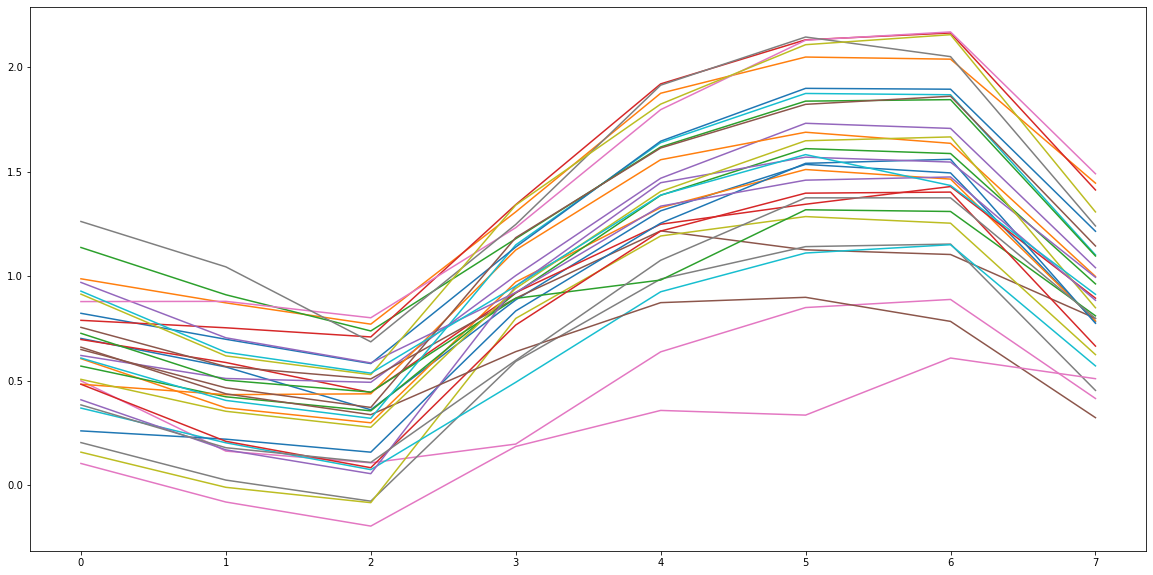

array([Timestamp('2017-01-01 00:00:00'), Timestamp('2017-01-01 03:00:00'),
       Timestamp('2017-01-01 06:00:00'), Timestamp('2017-01-01 09:00:00'),
       Timestamp('2017-01-01 12:00:00'), Timestamp('2017-01-01 15:00:00'),
       Timestamp('2017-01-01 18:00:00'), Timestamp('2017-01-01 21:00:00')],
      dtype=object)

In [48]:
plt.figure(figsize=(20,10))
for i in range(150, 150+30):
    plt.plot(trainX[i,:,11])

plt.show()
trainX[0, :, 0]



# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))


In [49]:
trainX = np.reshape(trainX[:, :, 1], (trainX[:, :, 1].shape[0], 1, trainX[:, :, 1].shape[1]))
testX = np.reshape(testX[:, :, 1], (testX[:, :, 1].shape[0], 1, testX[:, :, 1].shape[1]))

trainY.shape

(731, 1, 35)

In [50]:
trainY = trainY[:, 0, 33]
testY  = testY[:, 0, 33]


In [51]:
import matplotlib.pyplot as plt
import pandas
import math
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [52]:
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

print(trainX.shape)
print(trainY.shape)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 2,341
Trainable params: 2,341
Non-trainable params: 0
_________________________________________________________________
(731, 1, 8)
(731,)


In [53]:
trainX = tf.convert_to_tensor(trainX, dtype=tf.float32)
trainY = tf.convert_to_tensor(trainY, dtype=tf.float32)


In [54]:
model.fit(trainX, trainY, epochs=1000, batch_size=50, verbose=1)

Epoch 1/1000


UnknownError:    Fail to find the dnn implementation.
	 [[{{node CudnnRNN}}]]
	 [[sequential_1/lstm_1/PartitionedCall]] [Op:__inference_train_function_5835]

Function call stack:
train_function -> train_function -> train_function


In [192]:
testX = tf.convert_to_tensor(testX, dtype=tf.float32)
testY = tf.convert_to_tensor(testY, dtype=tf.float32)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# # invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.74 RMSE
Test Score: 1.00 RMSE


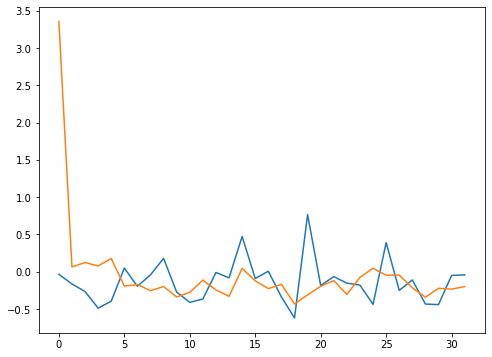

In [195]:
# shift train predictions for plotting
# trainPredictPlot = numpy.empty_like(dataset)
# trainPredictPlot[:, :] = numpy.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# # shift test predictions for plotting
# testPredictPlot = numpy.empty_like(dataset)
# testPredictPlot[:, :] = numpy.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# # plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredict[:32])
plt.plot(testPredict[:32])
plt.show()